In [1]:
#Import all the required libraries

!pip install wordcloud

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import tensorflow as tf
import keras
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from PIL import Image
#used for creating Progress Meters or Progress Bars
from tqdm import tqdm

import glob
from IPython import display
import collections
import wordcloud
from wordcloud import WordCloud, STOPWORDS


 <h2> Data Understanding and Visualization
</h2><ul>
  <li><p>Import the dataset and read image and captions into two seperate variables</p>
        </li>
  <li><p>Visualise both the images & text present in the dataset</p></li>
  <li>Visualise the top 30 occuring words in the captions
</li>
    li>Visualise the top 30 occuring words in the captions
</li>
<li>Create a list which contains all the captions & path</li>
</ul>





In [2]:
images='/kaggle/input/comic2animation/comic_images'
all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 400


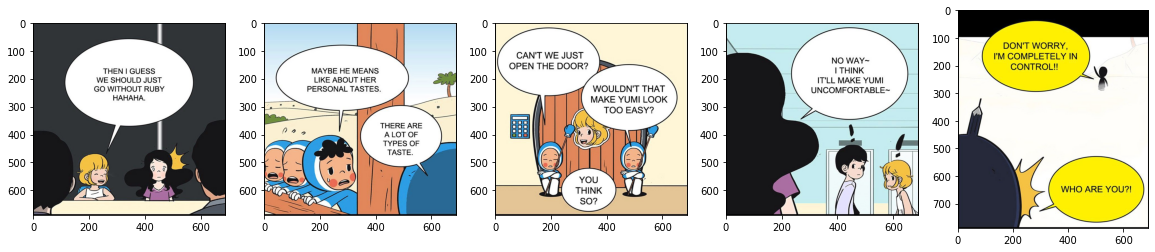

In [3]:
import imageio
#Visualising first 5 images :
Display_Images = all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)
for ax, image in zip(axes, Display_Images):
  ax.imshow(imageio.imread(image), cmap=None)


In [4]:
text_file = '/kaggle/input/comic2animation/textualContext.txt'
def load_doc(filename):
    open_file = open(text_file, 'r', encoding='latin-1' ) 
    text = open_file.read() 
    open_file.close()
    return text
doc = load_doc(text_file)
print(doc[:300])

image,caption
chapter_13_28.jpg,a boy is hesitant to say about his personal stuffs.
chapter_13_29.jpg,a number of small kids are getting inside head of a yellow haired girl
chapter_14_1.jpg,a boy is not willing to say something saying personal stuff while the girl looks confused
chapter_14_3.jpg,a n


In [5]:
img_path = '/kaggle/input/comic2animation/comic_images/'

all_img_id = [] 
all_img_vector = [] 
annotations = [] 

with open('/kaggle/input/comic2animation/textualContext.txt' , 'r') as fo:
  next(fo) 
  for line in fo :
    split_arr = line.split(',')
    all_img_id.append(split_arr[0])
    annotations.append(split_arr[1].rstrip('\n.').lower()) #removing out the \n.
    all_img_vector.append(img_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 

df.head(4)

ID                                               Path  \
0  chapter_13_28.jpg  /kaggle/input/comic2animation/comic_images/cha...   
1  chapter_13_29.jpg  /kaggle/input/comic2animation/comic_images/cha...   
2   chapter_14_1.jpg  /kaggle/input/comic2animation/comic_images/cha...   
3   chapter_14_3.jpg  /kaggle/input/comic2animation/comic_images/cha...   

                                            Captions  
0  a boy is hesitant to say about his personal st...  
1  a number of small kids are getting inside head...  
2  a boy is not willing to say something saying p...  
3  a number of small kids are trying to push a ro...

In [6]:
#check total captions and images present in dataset
print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_imgs)))

Total captions present in the dataset: 400
Total images present in the dataset: 400


In [7]:
#Create the vocabulary & the counter for the captions
vocabulary = [word.lower() for line in annotations for word in line.split()]
val_count = Counter(vocabulary) 
val_count

Counter({'a': 543,
         'boy': 134,
         'is': 180,
         'hesitant': 1,
         'to': 125,
         'say': 4,
         'about': 45,
         'his': 40,
         'personal': 3,
         'stuffs': 1,
         'number': 3,
         'of': 75,
         'small': 3,
         'kids': 38,
         'are': 66,
         'getting': 11,
         'inside': 8,
         'head': 9,
         'yellow': 16,
         'haired': 5,
         'girl': 230,
         'not': 20,
         'willing': 1,
         'something': 36,
         'saying': 12,
         'stuff': 1,
         'while': 51,
         'the': 210,
         'looks': 11,
         'confused': 13,
         'trying': 3,
         'push': 1,
         'rotating': 3,
         'wooden': 3,
         'handle': 1,
         'one': 15,
         'counting': 1,
         'there': 14,
         'rotations': 1,
         'thinking': 22,
         'her': 44,
         'friend': 11,
         'said': 8,
         'suspicious': 1,
         'if': 19,
         'meant'

a :  543
girl :  230
the :  210
is :  180
boy :  134
and :  128
to :  125
in :  120
with :  84
of :  75
are :  66
that :  56
while :  51
about :  45
her :  44
kid :  44
blonde :  43
his :  40
two :  39
she :  39
kids :  38
hair :  38
he :  37
something :  36
other :  32
on :  31
cute :  31
looking :  30
at :  24
wearing :  23


Text(0, 0.5, 'Count')

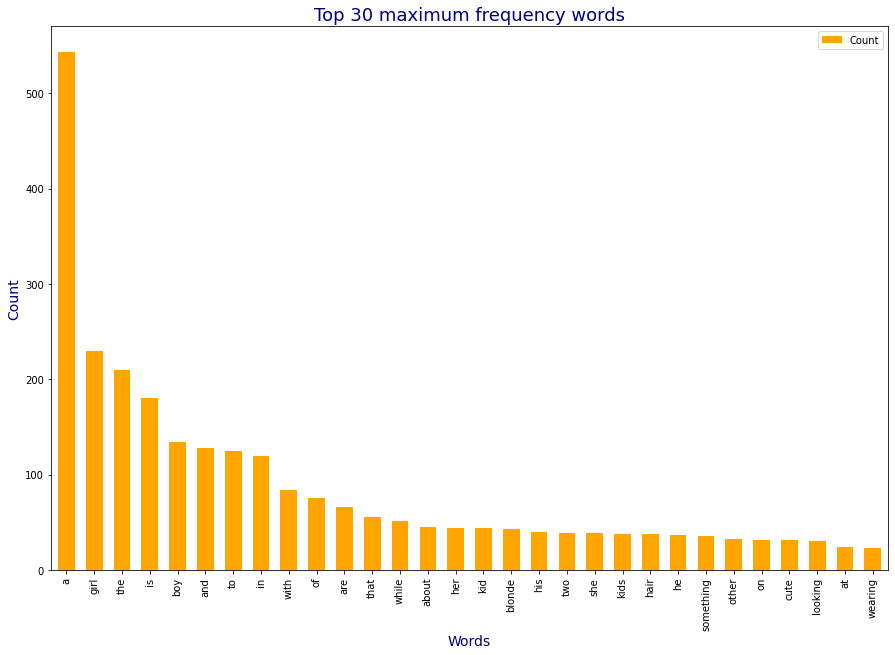

In [8]:
#Visualise the top 30 occuring words in the captions
for word, count in val_count.most_common(30):
  print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word', y='Count', width=0.6, color='orange', figsize=(15, 10))
plt.title("Top 30 maximum frequency words", fontsize = 18, color= 'navy')
plt.xlabel("Words", fontsize = 14, color= 'navy')
plt.ylabel("Count", fontsize = 14, color= 'navy')


### Clearly STOPWORDS form a clear majority

**Stop words are a set of commonly used words in a language.**

    Examples of stop words in English are “a”, “the”, “is”, “are” and etc. 

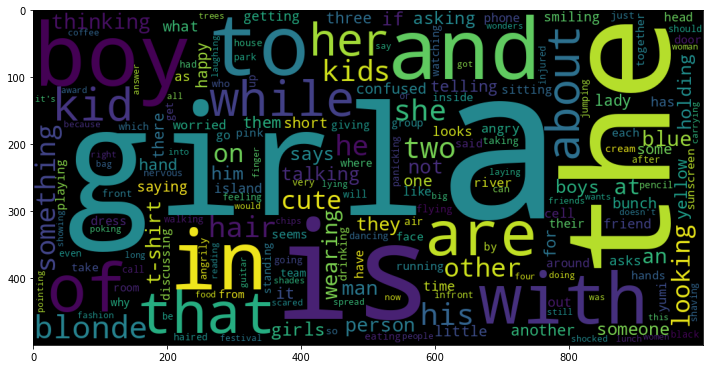

In [9]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

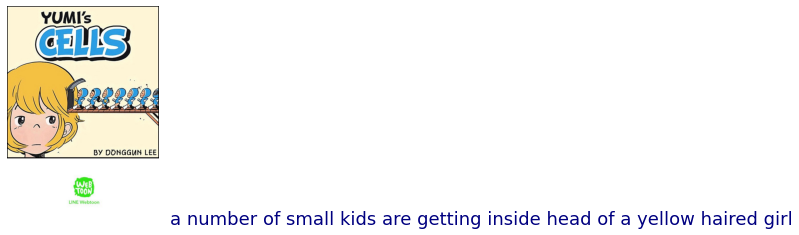

In [10]:
def caption_with_img_plot(image_id, frame) :
  capt = ("\n" *2).join(frame[frame['ID'] == image_id].Captions.to_list())
  fig, ax = plt.subplots()
  ax.set_axis_off()
  idx = df.ID.to_list().index(image_id)
  im =  Image.open(df.Path.iloc[idx])
  w, h = im.size[0], im.size[-1]
  ax.imshow(im)
  ax.text(w+50, h, capt, fontsize = 18, color = 'navy')
caption_with_img_plot(df.ID.iloc[1], df)


 <h2> Clean Data
</h2><ul>
<li><p> Remove punctuations</p></li>
<li><p>Convert captions to lowercase</p></li>
<li>Visualise the top 30 occuring words in the captions</li>
<li>Visualise the top 30 occuring words in the captions</li> 
<li>Create a list which contains all the captions & path</li>
</ul>





In [11]:
#data cleaning
rem_punct = str.maketrans('', '', string.punctuation)
for r in range(len(annotations)) :
  line = annotations[r]
  line = line.split()

  # converting to lowercase
  line = [word.lower() for word in line]

  # remove punctuation from each caption and hanging letters
  line = [word.translate(rem_punct) for word in line]
  line = [word for word in line if len(word) > 1]

  # remove numeric values
  line = [word for word in line if word.isalpha()]

  annotations[r] = ' '.join(line)


In [12]:
#add the <start> & <end> token to all those captions as well
annotations = ['<start>' + ' ' + line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path = all_img_vector

In [13]:
##list contatining captions for an image
annotations[0:5]

['<start> boy is hesitant to say about his personal stuffs <end>',
 '<start> number of small kids are getting inside head of yellow haired girl <end>',
 '<start> boy is not willing to say something saying personal stuff while the girl looks confused <end>',
 '<start> number of small kids are trying to push rotating wooden handle while one is counting there rotations <end>',
 '<start> girl thinking about something her friend said <end>']

 <h2> Data Preprocessing</h2>
 <ul>
  <li><p>Create the tokenized vectors by tokenizing the captions for ex :split them using spaces & other filters./p>
        </li>
  <li><p>This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.</p></li>
    <li><p>Replace all other words with the unknown token "UNK"</p>
</li>
    <li><p>Create word-to-index and index-to-word mappings.</p>
</li>
    <li><p>Pad all sequences to be the same length as the longest one</p></li>
</ul>




In [14]:
# Creating the tokenizer
top_word_cnt = 5000
tokenizer = Tokenizer(num_words = top_word_cnt+1, filters= '!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',
                      lower = True, char_level = False, 
                      oov_token = 'UNK')

In [15]:
# Creating word-to-index and index-to-word mappings.

tokenizer.fit_on_texts(annotations)
#transform each text into a sequence of integers
train_seqs = tokenizer.texts_to_sequences(annotations)

In [16]:
# We add PAD token for zero
tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [17]:
print(tokenizer.oov_token)
print(tokenizer.index_word[0])

UNK
PAD


In [18]:
tokenizer.index_word

{1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'girl',
 5: 'the',
 6: 'is',
 7: 'boy',
 8: 'and',
 9: 'to',
 10: 'in',
 11: 'with',
 12: 'of',
 13: 'are',
 14: 'that',
 15: 'while',
 16: 'about',
 17: 'her',
 18: 'kid',
 19: 'blonde',
 20: 'his',
 21: 'kids',
 22: 'two',
 23: 'she',
 24: 'hair',
 25: 'he',
 26: 'something',
 27: 'other',
 28: 'on',
 29: 'cute',
 30: 'looking',
 31: 'at',
 32: 'wearing',
 33: 'thinking',
 34: 'an',
 35: 'blue',
 36: 'tshirt',
 37: 'man',
 38: 'not',
 39: 'person',
 40: 'boys',
 41: 'if',
 42: 'girls',
 43: 'says',
 44: 'they',
 45: 'talking',
 46: 'holding',
 47: 'him',
 48: 'asking',
 49: 'someone',
 50: 'yellow',
 51: 'hand',
 52: 'one',
 53: 'for',
 54: 'them',
 55: 'it',
 56: 'telling',
 57: 'there',
 58: 'another',
 59: 'three',
 60: 'happy',
 61: 'lady',
 62: 'confused',
 63: 'some',
 64: 'what',
 65: 'little',
 66: 'short',
 67: 'bunch',
 68: 'saying',
 69: 'getting',
 70: 'looks',
 71: 'friend',
 72: 'angry',
 73: 'out',
 74: 'time',
 75: 'as',
 76:

In [19]:
# Creating a word count for our tokenizer to visualize the Top 30 occuring words after text processing

tokenizer_top_words = [word for line in annotations for word in line.split() ]

#tokenizer_top_words_count
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)


<start> :  400
<end> :  400
girl :  230
the :  210
is :  180
boy :  134
and :  128
to :  125
in :  120
with :  84
of :  75
are :  66
that :  56
while :  51
about :  45
her :  44
kid :  44
blonde :  43
his :  40
kids :  39
two :  39
she :  39
hair :  38
he :  37
something :  36
other :  32
on :  31
cute :  31
looking :  30
at :  24


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  if sys.path[0] == '':


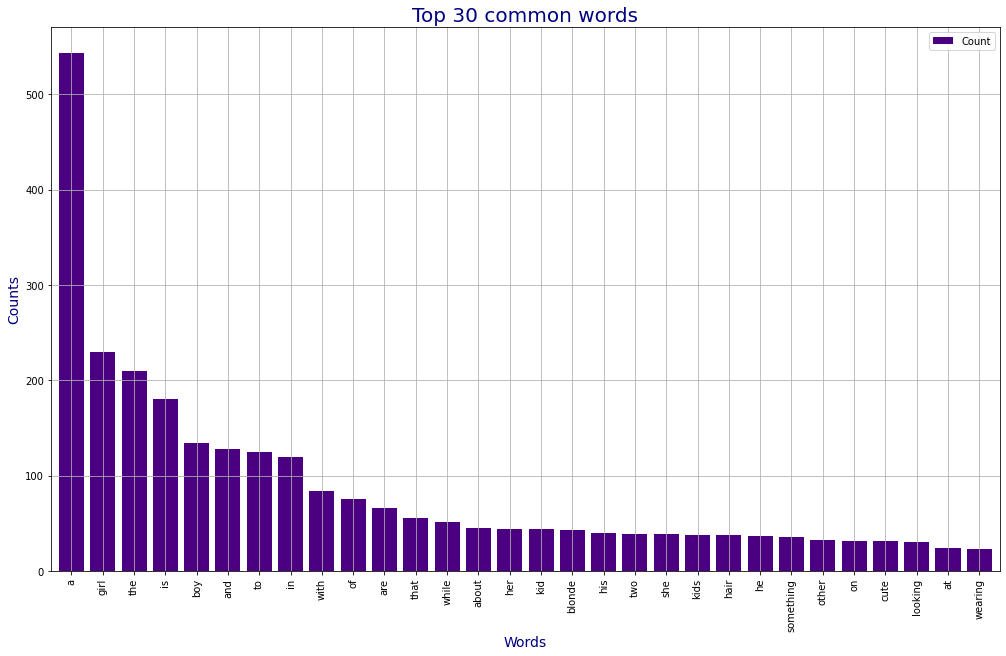

In [20]:
for word, count in tokenizer_top_words_count.most_common(30) :
  print(word, ": ", count)

tokens = tokenizer_top_words_count.most_common(30)
most_com_words_df = pd.DataFrame(tokens, columns = ['Word', 'Count'])

#plot 30 most common words
most_common_words_df.plot.bar(x = 'Word', y= 'Count', width=0.8, color = 'indigo', figsize = (17, 10))
plt.title('Top 30 common words', fontsize =20, color= 'navy')
plt.xlabel('Words', fontsize =14, color= 'navy')
plt.ylabel('Counts', fontsize =14, color= 'navy')
plt.grid(b=None)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


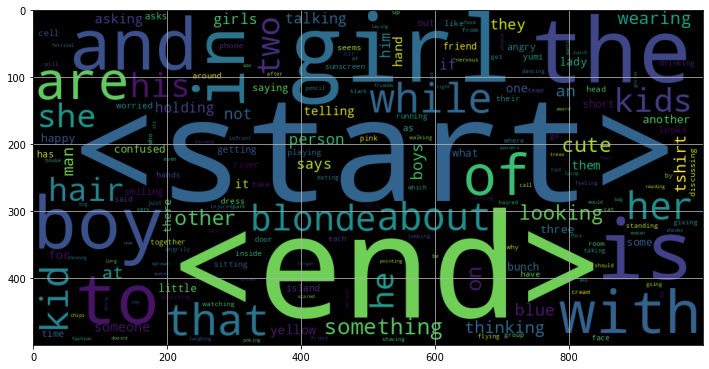

In [21]:
wordcloud_token = WordCloud(width = 1000, height = 500).generate_from_frequencies(tokenizer_top_words_count)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud_token)
plt.grid(b = None)

In [22]:
# Pad each vector to the max_length of the captions  store it to a vairable

train_seqs_len = [len(seq) for seq in train_seqs]

longest_word_length = max(train_seqs_len)

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)
print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(400, 38)


In [23]:
# creating list to store preprocessed images and setting up the Image Shape

preprocessed_image = []
IMAGE_SHAPE = (299, 299)

In [24]:
#checking image format 

tf.keras.backend.image_data_format()


'channels_last'

In [25]:
for img in all_imgs[0:5] :
    img = tf.io.read_file(img, name=None)
    img = tf.image.decode_jpeg(img, channels=0)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    preprocessed_image.append(img)


Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)


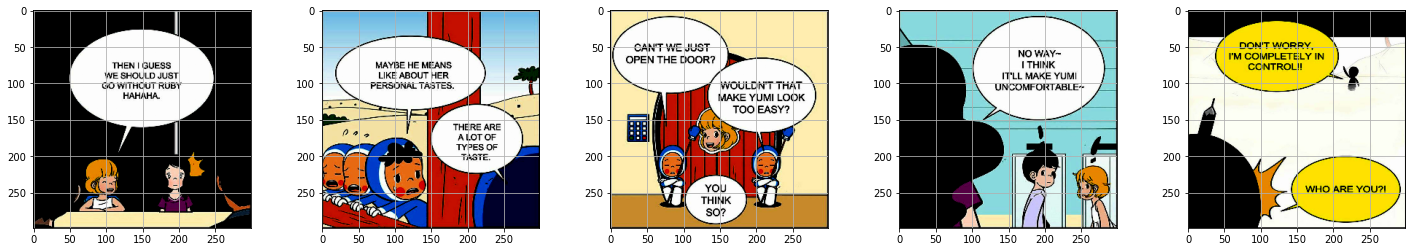

In [26]:
# checking first five images post preprocessing
Display_Images = preprocessed_image[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(25)
for ax, image in zip(axes, Display_Images) :
  print('Shape after resize : ', image.shape)
  ax.imshow(image)
  ax.grid('off')


 <h2>  Dataset creation
</h2><ul>
  <li><p>Create a function which maps the image path to their feature</p>
        </li>
  <li><p>Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset</p></li>
  <li>Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 95-05 ratio & random state = 42
</li>
    <li>Make sure you have done Shuffle and batch while building the dataset</li>
<li>
The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)
</li>

</ul>






In [27]:
def load_images(image_path) :
  img = tf.io.read_file(image_path, name = None)
  img = tf.image.decode_jpeg(img, channels=0)
  img = tf.image.resize(img, IMAGE_SHAPE)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [28]:
# Map each image full path to the function, in order to preprocess the image
training_list = sorted(set(all_img_vector))
New_Img = tf.data.Dataset.from_tensor_slices(training_list)
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
New_Img = New_Img.batch(64, drop_remainder=False)


In [29]:
#Ratio = 95:05 and we will set random state = 42
path_train, path_test, caption_train, caption_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 42)

In [30]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 320
Testing data for images: 80
Training data for Captions: 320
Testing data for Captions: 80


 <h2> Load the pretrained Imagenet weights of Inception net V3
</h2><ul>
  <li><p>To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.</p>
        </li>
  <li><p>The shape of the output of this layer is 8x8x2048.</p></li>
  <li>Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)
</li>
   

    

In [31]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
new_input = image_model.input 
hidden_layer = image_model.layers[-1].output  
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)

87924736/87910968 [==============================] - 4s 0us/step


In [32]:
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [33]:
# extract features from each image in the dataset
img_features = {}
for image, image_path in tqdm(New_Img) :
  batch_features = image_features_extract_model(image)
  #squeeze out the features in a batch
  batch_features_flattened = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
  for batch_feat, path in zip(batch_features_flattened, image_path) :
    feature_path = path.numpy().decode('utf-8')
    img_features[feature_path] = batch_feat.numpy()

100%|██████████| 7/7 [00:08<00:00,  1.22s/it]


In [34]:
#view top five items of img_features dict
import more_itertools
top_5 = more_itertools.take(5, img_features.items())
top_5

[('/kaggle/input/comic2animation/comic_images/chapter_13_28.jpg',
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)),
 ('/kaggle/input/comic2animation/comic_images/chapter_13_29.jpg',
  array([[0.06408226, 0.03403043, 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.48937404, 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.5222715 , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.        , 0.        , 0.8029295 , ..., 0.        , 0.        ,
          0.        ],
         [0.3224807 , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.     

In [35]:
#to provide, both images along with the captions as input
def map(image_name, caption):
    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption

In [36]:
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier
BUFFER_SIZE = 1000
BATCH_SIZE = 64
def gen_dataset(img, capt):
        
    data = tf.data.Dataset.from_tensor_slices((img, capt))
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)
    
     
    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    return data

In [37]:
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)

In [38]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(64, 64, 2048)
(64, 38)


<h2> Model Building</h2>
<ul>
 <li><p>Set the parameters</p></li>
<li><p>Build the Encoder</p></li>
<li><p>Visualise the top 30 occuring words in the captions<p></li>
    <li><p>Visualise the top 30 occuring words in the captions</p></li>
    <li><p>Create a list which contains all the captions & path</p></li>
</ul>

In [39]:
# Setting  parameters

embedding_dim = 256 
units = 512

#top 5,000 words +1
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE 
test_num_steps = len(path_test) // BATCH_SIZE  

max_length = 31
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

 <h2>  Encoder (CNN)
</h2><ul>
  <li><p>The encoder parts involve the convolution of the input image with the help of various convolution, max pooling, and fully connected layers. </p>
        </li>
  <li><p>Since we are not dealing with the classification of the image, we have removed them from the end. 
</p></li>
    <li><p>The final output of the encoder part will be the generation of the feature vector.</p>
</li>
    
</ul>


In [40]:
tf.compat.v1.reset_default_graph()
print(tf.compat.v1.get_default_graph())

In [41]:
#Building Encoder using CNN Keras subclassing method

class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features

In [42]:
encoder=Encoder(embedding_dim)

In [43]:
from keras.utils.vis_utils import plot_model


 <h2> Important aspects of Encoder
</h2><ul>
  <li><p>The CNN-based encoder produces the feature vector which is the encoded representation of the input image.</p>
        </li>
  <li><p>The resulting **feature vector is static** and does not change at each timestamp.
    </p></li>
    <li><p>Therefore we need to pass this vector to the **attention model along with the hidden state of the decoder to create the context vector**. </p>
</li>
   
</ul>


 <h2> Attention model
</h2><ul>
  <li><p>Attention is an interface connecting the encoder and decoder that provides the decoder with information from every encoder hidden state.</p>
        </li>
  <li><p>With this framework, the model is able to  selectively focus on valuable parts of the input sequence and hence, learn the association between them.</p></li>
    <li><p>The attention model produces an output(context vector) that is fed to the decoder for predicting the word at that timestamp</p>
</li>
    <li><p>This output, i.e context vector is adaptive in nature and change for each timestamp</p>
</li>
    <li><p>It aims to overcome the limitation of traditional CNN-RNN based models. Using this, **instead of passing the complete input image to the RNN at every timestamp, we can pass different relevant parts of the image to it</p></li>
</ul>


 

In [44]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) 
        self.W2 = tf.keras.layers.Dense(units) 
        self.V = tf.keras.layers.Dense(1) 
        self.units=units

    def call(self, features, hidden):
        hidden_with_time_axis = hidden[:, tf.newaxis]
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))  
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1) 
        context_vector = attention_weights * features 
        context_vector = tf.reduce_sum(context_vector, axis=1)  
        return context_vector, attention_weights

 <h2> Decoder </h2><ul>
  <li><p>Input to GRU : Context vector (from attention model) concatenated with  embedded vector (embedding layer). Output of this concatenation layer is fed to GRU as input</p>
        </li>
  <li><p>Embedding layer present inside the decoder takes the input sequence preprocessed and transformed such that all samples have equal sequence length - through padding followed by masking). Embedding layer transforms this into an embedded vector.</p></li>
  <li><p>Concatenation layer contains : Embedded vector (output of embedding layer) along with the Context vector (output of attention model)</p>
</li>
    
</ul>




In [45]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [46]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [47]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


 <h2> Model training & optimization
</h2><ul>
  <li><p>Set the optimizer & loss object</p></li>
  <li><p>Visualise both the images & text present in the dataset</p></li>
    <li><p>Create your checkpoint path</p></li>
    <li><p>Create your training & testing step functions</p></li>
    <li><p>Create your loss function for the test dataset</p></li>
</ul>




In [48]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)  #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE) #define your loss object

In [49]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    #loss is getting multiplied with mask to get an ideal shape
    
    return tf.reduce_mean(loss_)

 <h2> Why Masking ?</h2>
 <ul>
  <li><p>Padding can result in a risk of adding penalty to the model.</p>
        </li>
  <li><p>Once the padding is done, we need to apply 'masking'</p></li>
    <li><p>Without masking, the model will **consider the padded input at that timestep, which will contribute to an increased loss</p>
</li>
    <li><p>Through masking we need to inform the model to **ignore whenever a padded input is passed at a timestep**, hinting that this part of the input is padded.</p>
</li>
<li>Create a list which contains all the captions & path</li>
</ul>

  
 




In [50]:
checkpoint_path = "comic2animation/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [51]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

 <h2> While creating the training step for your model, we will apply Teacher forcing mechanism.
</h2><ul>
  <li><p>Why Teacher Forcing ?</p></li>
  <li><p>There are multiple issues with with training recurrent neural networks that use output from prior time steps as input :</p></li>
 <li><p>Slow convergence</p></li>
    
 <li><p>Model instability</p></li>
    
 <li><p>Poor skill</p></li>
 <li><p>If the previous output is incorrect (by any chance), it will result in inaccurate input for the next time stamp which will further result in a different output than expected and the process will continue.</p>
</li>
<li>As a result, the model will get off track and will get punished for every subsequent word it generates. This makes learning slower and the model unstable.</li>
<li><p>To address this we Teacher Forcing</p></li>
</ul>



 <P>Teacher forcing is a fast and effective way to train a recurrent neural network, where the **target/real word (i.e ground truth) is passed as the next input to the decoder instead of previous prediciton or output.**
 
 
 Training with Teacher Forcing **converges faster.** At the early stages of training, the predictions of the model are very bad.
 
 If we do not use Teacher Forcing, the hidden states of the model will be updated by a sequence of wrong predictions, errors will accumulate, and it is difficult for the model to learn from that.</P>

In [52]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        
        encoder_op = encoder(img_tensor)
        for r in range(1, target.shape[1]) :
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

In [53]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size = target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)
      for r in range(1, target.shape[1]) :
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)
        dec_input = tf.expand_dims(target[: , r], 1)
    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) 
    optimizer.apply_gradients(zip(grad, trainable_vars))                      
    return loss, avg_loss

In [54]:
def test_loss_cal(test_dataset):
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [55]:
loss_plot = []
test_loss_plot = []
EPOCHS = 30
best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0
    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps   
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  3%|▎         | 1/30 [01:33<45:11, 93.51s/it]

For epoch: 1, the train loss is 2.380, & test loss is 3.926
Time taken for 1 epoch 93.30466318130493 sec

Test loss has been reduced from 100.000 to 3.926


  7%|▋         | 2/30 [01:34<18:17, 39.21s/it]

For epoch: 2, the train loss is 1.792, & test loss is 3.631
Time taken for 1 epoch 1.0365610122680664 sec

Test loss has been reduced from 3.926 to 3.631


 10%|█         | 3/30 [01:35<09:49, 21.85s/it]

For epoch: 3, the train loss is 1.737, & test loss is 3.528
Time taken for 1 epoch 1.0315563678741455 sec

Test loss has been reduced from 3.631 to 3.528


 13%|█▎        | 4/30 [01:36<05:54, 13.62s/it]

For epoch: 4, the train loss is 1.717, & test loss is 3.580
Time taken for 1 epoch 1.0179126262664795 sec



 17%|█▋        | 5/30 [01:37<03:47,  9.08s/it]

For epoch: 5, the train loss is 1.712, & test loss is 3.558
Time taken for 1 epoch 1.0259063243865967 sec



 20%|██        | 6/30 [01:38<02:32,  6.35s/it]

For epoch: 6, the train loss is 1.708, & test loss is 3.594
Time taken for 1 epoch 1.0524399280548096 sec



 23%|██▎       | 7/30 [01:40<01:46,  4.62s/it]

For epoch: 7, the train loss is 1.697, & test loss is 3.552
Time taken for 1 epoch 1.0421314239501953 sec



 27%|██▋       | 8/30 [01:41<01:16,  3.47s/it]

For epoch: 8, the train loss is 1.682, & test loss is 3.570
Time taken for 1 epoch 1.0201992988586426 sec



 30%|███       | 9/30 [01:42<00:58,  2.76s/it]

For epoch: 9, the train loss is 1.657, & test loss is 3.297
Time taken for 1 epoch 1.0537512302398682 sec

Test loss has been reduced from 3.528 to 3.297


 33%|███▎      | 10/30 [01:43<00:44,  2.23s/it]

For epoch: 10, the train loss is 1.632, & test loss is 3.338
Time taken for 1 epoch 1.046807050704956 sec



 37%|███▋      | 11/30 [01:44<00:35,  1.87s/it]

For epoch: 11, the train loss is 1.595, & test loss is 3.429
Time taken for 1 epoch 1.0501644611358643 sec



 40%|████      | 12/30 [01:45<00:29,  1.66s/it]

For epoch: 12, the train loss is 1.548, & test loss is 3.126
Time taken for 1 epoch 1.0182607173919678 sec

Test loss has been reduced from 3.297 to 3.126


 43%|████▎     | 13/30 [01:46<00:25,  1.52s/it]

For epoch: 13, the train loss is 1.505, & test loss is 3.097
Time taken for 1 epoch 1.0357000827789307 sec

Test loss has been reduced from 3.126 to 3.097


 47%|████▋     | 14/30 [01:47<00:22,  1.42s/it]

For epoch: 14, the train loss is 1.463, & test loss is 2.902
Time taken for 1 epoch 1.025435209274292 sec

Test loss has been reduced from 3.097 to 2.902


 50%|█████     | 15/30 [01:48<00:19,  1.31s/it]

For epoch: 15, the train loss is 1.419, & test loss is 2.941
Time taken for 1 epoch 1.0463685989379883 sec



 53%|█████▎    | 16/30 [01:50<00:17,  1.28s/it]

For epoch: 16, the train loss is 1.374, & test loss is 2.663
Time taken for 1 epoch 1.0332140922546387 sec

Test loss has been reduced from 2.902 to 2.663


 57%|█████▋    | 17/30 [01:51<00:16,  1.25s/it]

For epoch: 17, the train loss is 1.330, & test loss is 2.637
Time taken for 1 epoch 1.0362818241119385 sec

Test loss has been reduced from 2.663 to 2.637


 60%|██████    | 18/30 [01:52<00:14,  1.18s/it]

For epoch: 18, the train loss is 1.299, & test loss is 2.641
Time taken for 1 epoch 1.0166831016540527 sec



 63%|██████▎   | 19/30 [01:53<00:13,  1.19s/it]

For epoch: 19, the train loss is 1.250, & test loss is 2.435
Time taken for 1 epoch 1.0286400318145752 sec

Test loss has been reduced from 2.637 to 2.435


 67%|██████▋   | 20/30 [01:54<00:11,  1.14s/it]

For epoch: 20, the train loss is 1.204, & test loss is 2.681
Time taken for 1 epoch 1.0248255729675293 sec



 70%|███████   | 21/30 [01:55<00:10,  1.15s/it]

For epoch: 21, the train loss is 1.154, & test loss is 2.355
Time taken for 1 epoch 1.0280804634094238 sec

Test loss has been reduced from 2.435 to 2.355


 73%|███████▎  | 22/30 [01:57<00:09,  1.17s/it]

For epoch: 22, the train loss is 1.107, & test loss is 1.997
Time taken for 1 epoch 1.0343623161315918 sec

Test loss has been reduced from 2.355 to 1.997


 77%|███████▋  | 23/30 [01:58<00:08,  1.18s/it]

For epoch: 23, the train loss is 1.059, & test loss is 1.838
Time taken for 1 epoch 1.0416061878204346 sec

Test loss has been reduced from 1.997 to 1.838


 80%|████████  | 24/30 [01:59<00:06,  1.14s/it]

For epoch: 24, the train loss is 1.008, & test loss is 2.135
Time taken for 1 epoch 1.036001205444336 sec



 83%|████████▎ | 25/30 [02:00<00:05,  1.16s/it]

For epoch: 25, the train loss is 0.966, & test loss is 1.771
Time taken for 1 epoch 1.0374538898468018 sec

Test loss has been reduced from 1.838 to 1.771


 87%|████████▋ | 26/30 [02:01<00:04,  1.18s/it]

For epoch: 26, the train loss is 0.936, & test loss is 1.622
Time taken for 1 epoch 1.0499765872955322 sec

Test loss has been reduced from 1.771 to 1.622


 90%|█████████ | 27/30 [02:02<00:03,  1.18s/it]

For epoch: 27, the train loss is 0.893, & test loss is 1.549
Time taken for 1 epoch 1.025573968887329 sec

Test loss has been reduced from 1.622 to 1.549


 93%|█████████▎| 28/30 [02:04<00:02,  1.19s/it]

For epoch: 28, the train loss is 0.863, & test loss is 1.524
Time taken for 1 epoch 1.038426399230957 sec

Test loss has been reduced from 1.549 to 1.524


 97%|█████████▋| 29/30 [02:05<00:01,  1.19s/it]

For epoch: 29, the train loss is 0.805, & test loss is 1.279
Time taken for 1 epoch 1.0335404872894287 sec

Test loss has been reduced from 1.524 to 1.279


100%|██████████| 30/30 [02:06<00:00,  4.21s/it]

For epoch: 30, the train loss is 0.739, & test loss is 1.383
Time taken for 1 epoch 1.0223884582519531 sec



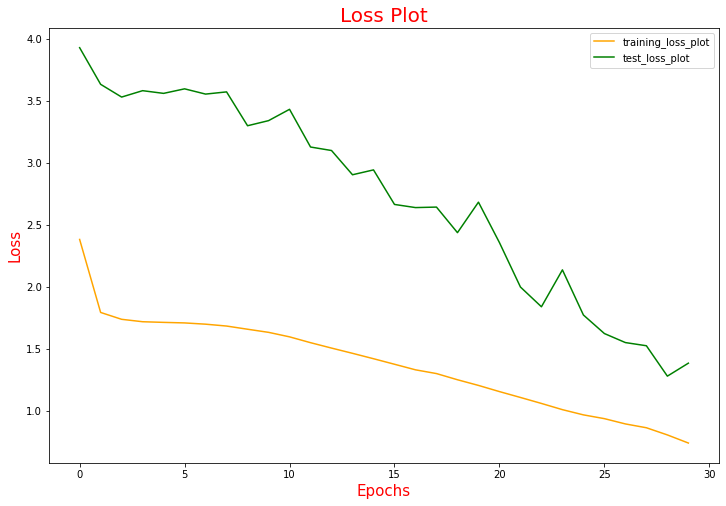

In [56]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))
plt.plot(loss_plot, color='orange', label = 'training_loss_plot')
plt.plot(test_loss_plot, color='green', label = 'test_loss_plot')
plt.xlabel('Epochs', fontsize = 15, color = 'red')
plt.ylabel('Loss', fontsize = 15, color = 'red')
plt.title('Loss Plot', fontsize = 20, color = 'red')
plt.legend()
plt.show()


<h2>Model Evaluation</h2> 
<ul>
<li><p>Define your evaluation function using greedy search</p></li>
<li><p>Define your evaluation function using beam search ( optional)</p></li>
<li><p>Test it on a sample data using BLEU score</p></li>
</ul>

<h2>Greedy Search</h2>
<ul>
 <li>This method is a simple approximation technique which calculates the probability of the words according to their occurrence in the English vocabulary.</li>
 
 <li>It takes the sample of the words, finds the probability of each of the words, and then outputs the word with the highest probability.</li>
 
 <li>Greedy Search will always consider only one best alternative and this makes the computational speed of the model fast, but the accuracy might not be up to the mark.</li>
    </ul>

In [57]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_images(image)[0], 0) 
    img_tensor_val = image_features_extract_model(temp_input) 
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder (img_tensor_val) 

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) 
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() 
        result.append (tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [58]:
def plot_attention_map (caption, weights, image) :

  fig = plt.figure(figsize = (20, 20))
  temp_img = np.array(Image.open(image))

  cap_len = len(caption)
  for cap in range(cap_len) :
    weights_img = np.reshape(weights[cap], (8,8))
    wweights_img = np.array(Image.fromarray(weights_img).resize((224,224), Image.LANCZOS))

    ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
    ax.set_title(caption[cap], fontsize = 14, color = 'red')

    img = ax.imshow(temp_img)

    ax.imshow(weights_img, cmap='gist_heat', alpha=0.6, extent=img.get_extent())
    ax.axis('off')
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  plt.show()

In [59]:
from nltk.translate.bleu_score import sentence_bleu

In [60]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [61]:
image_test = path_test.copy()

In [62]:
def pred_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)) :

    cap_test_data = caption_test.copy()
    rid = np.random.randint(0, random)
    test_image = image_test[rid]
    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)
    real_caption=filt_text(real_caption)      
    pred_caption=' '.join(result).rsplit(' ', 1)[0]
    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()
    score = sentence_bleu(reference, candidate, weights=weights)#set your weights
    print(f"BLEU score: {score*100}")
    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attention_map(result, attention_plot, test_image)

    return test_image
    


 <h2> Test Images
</h2><ul>
  <li><p>BLEU is a well-acknowledged metric to measure similarity of one hypothesis sentence to multiple reference sentences. Given a single hypothesis sentence and multiple reference sentences, it returns a value between 0 and 1</p>
        </li>
  <li><p>The metric close to 1 means that the two are very similar.</p></li>
  <li>We use the BLEU measure to evaluate the result of the test set generated captions. The BLEU is simply taking the fraction of n-grams in the predicted sentence that appears in the ground-truth
</li>   
</ul>

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU score: 0.9010608419300219
Real Caption: boy is playing guitar and singing lullaby to little yumi while other two boys are fighting
Prediction Caption: boy is hand


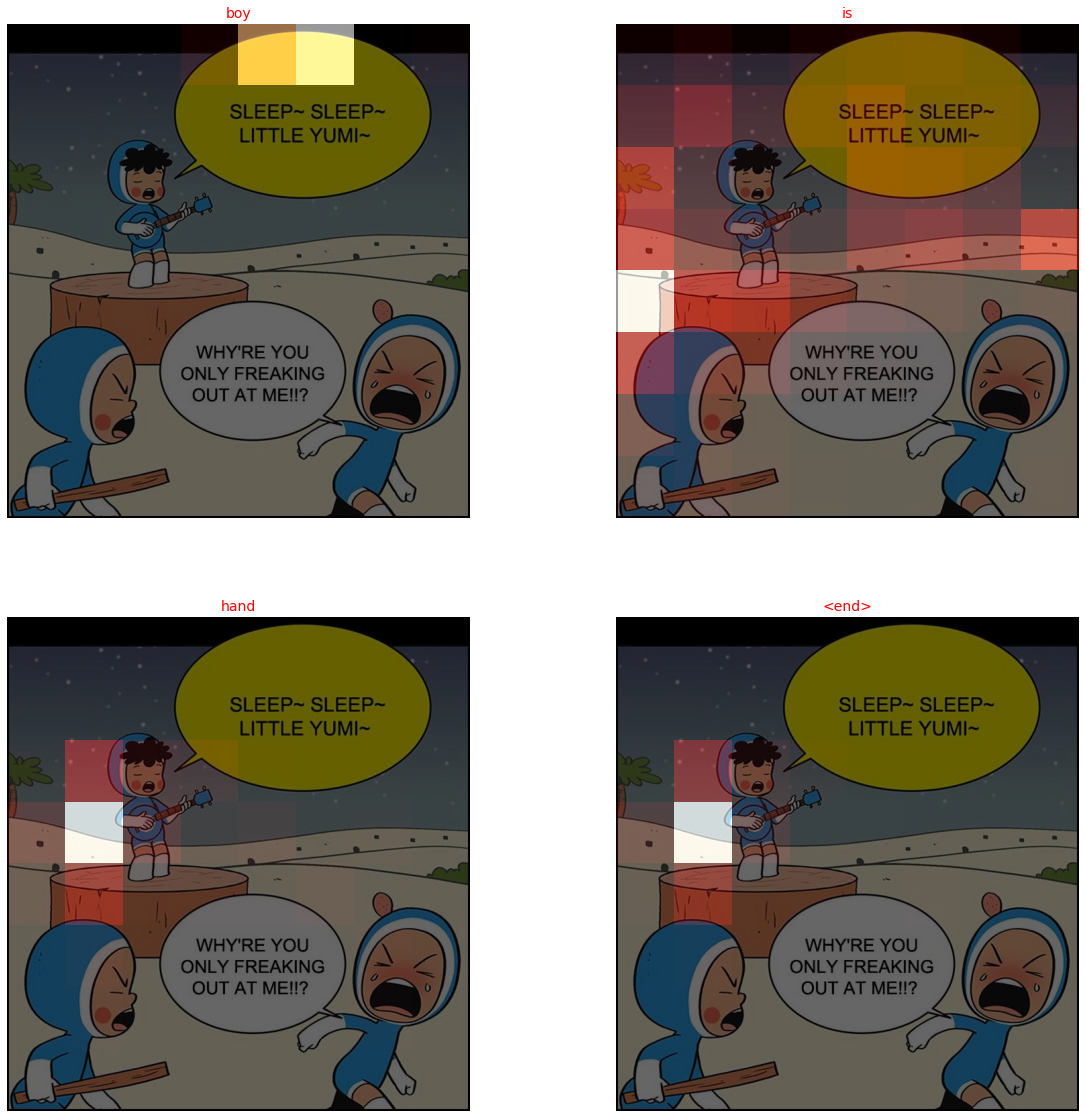

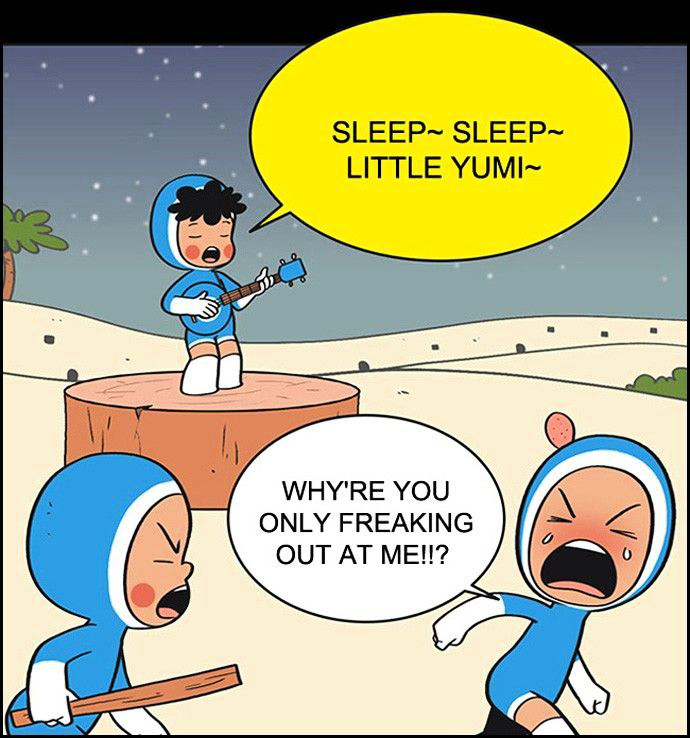

In [63]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

BLEU score: 100.0
Real Caption: three kids panicked while looking at the river
Prediction Caption: three kids panicked while looking at the river


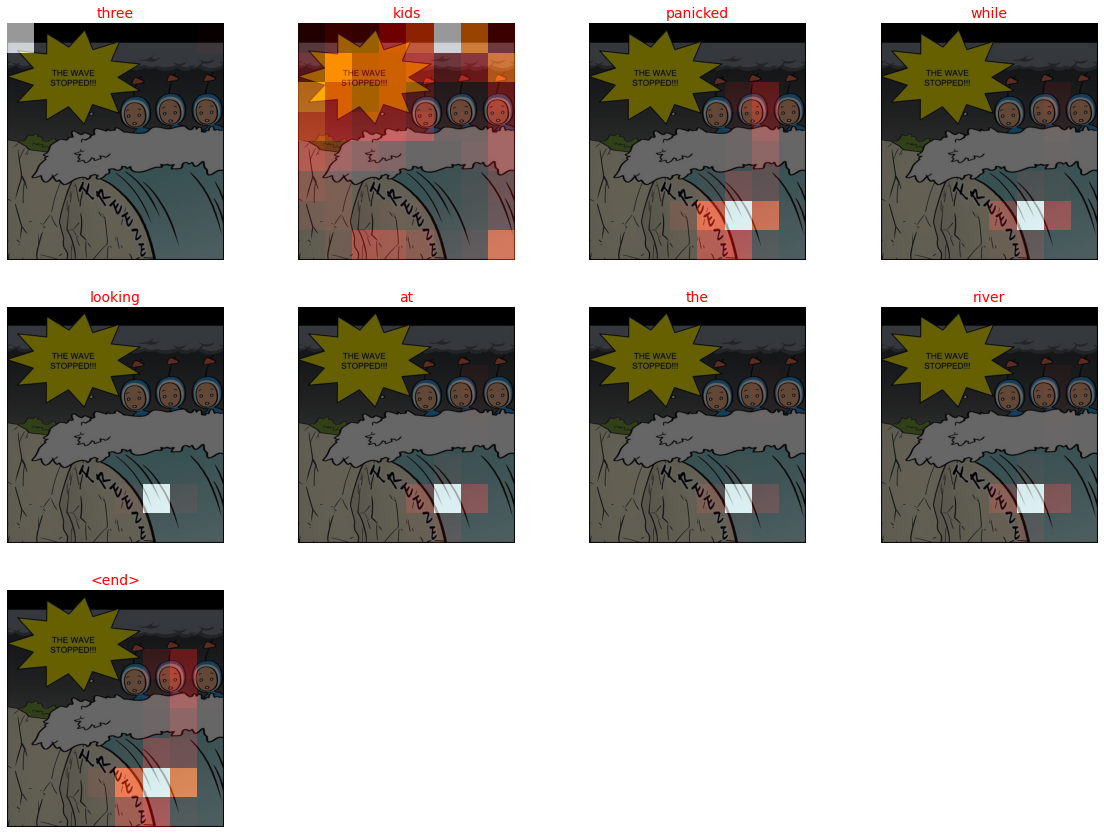

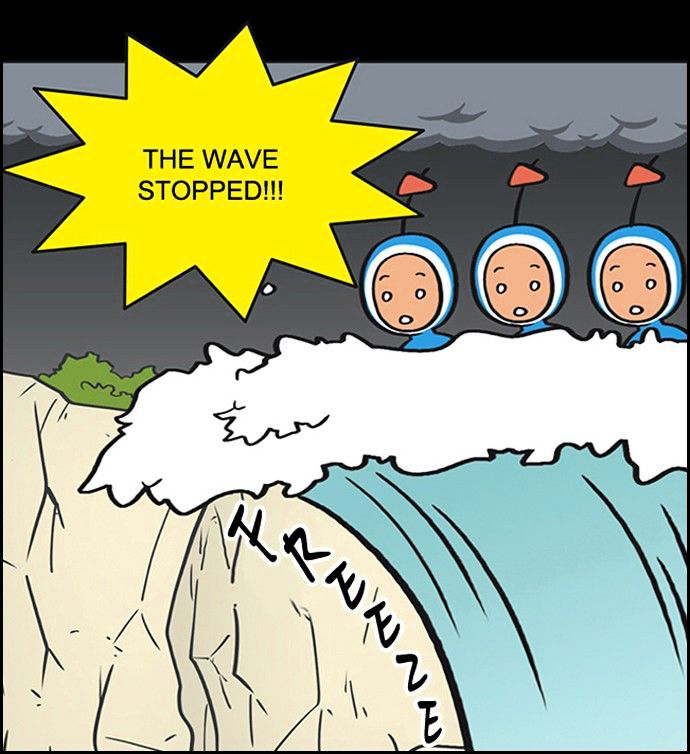

In [64]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

BLEU score: 36.260327802891275
Real Caption: girl and her friends are looking to something
Prediction Caption: girl is are looking at the camera


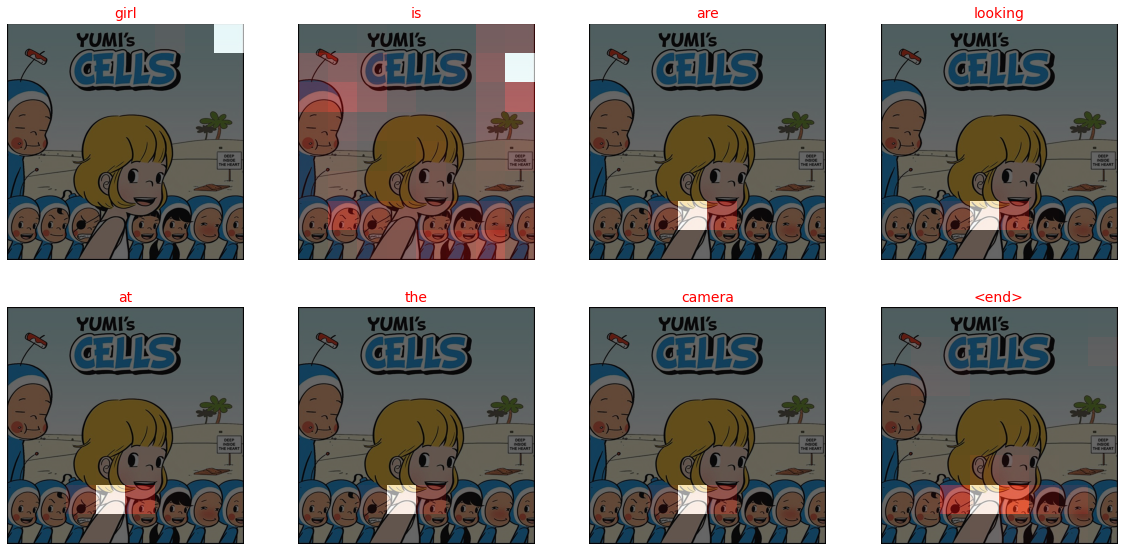

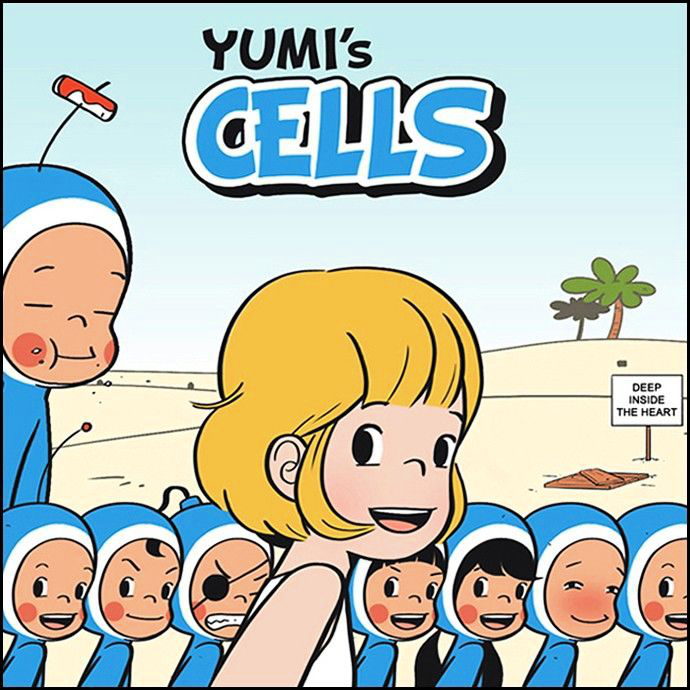

In [65]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU score: 18.257418583505537
Real Caption: girl is in dilemma
Prediction Caption: girl with blonde hair infront of nobody with blonde hair infront of nobody with blonde hair infront of nobody with blonde hair infront of nobody with blonde hair infront of


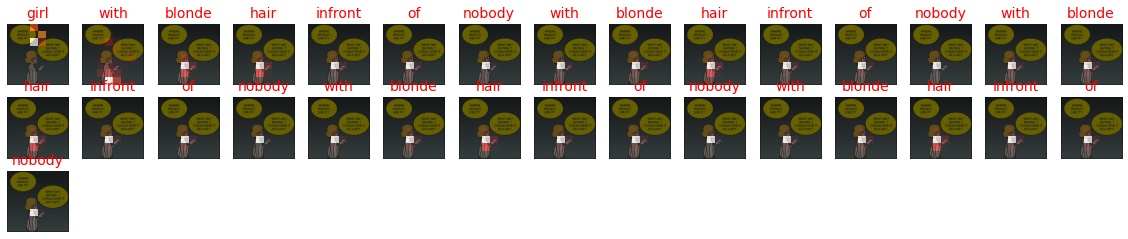

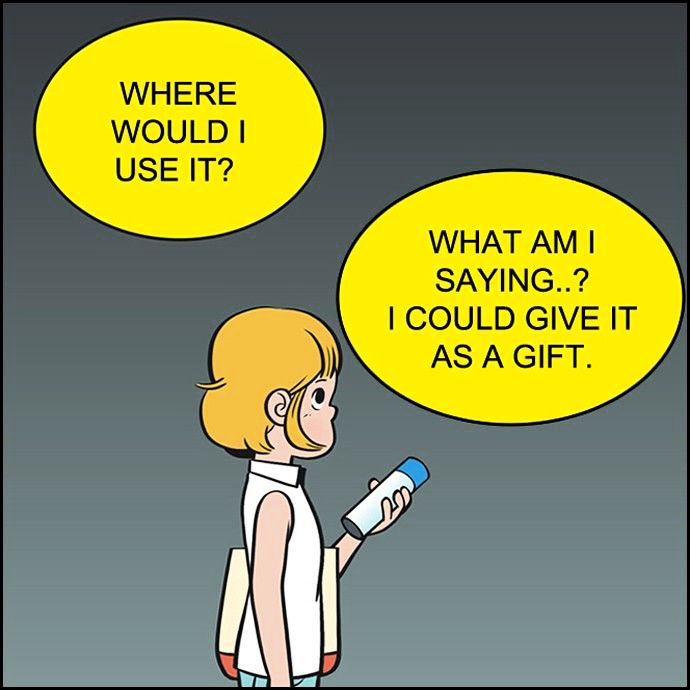

In [66]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.5, 0, 0))
Image.open(test_image)

BLEU score: 25.819888974716115
Real Caption: girl in shades in angry with the other fellow while he tries to calm her down
Prediction Caption: girl with guitar with guitar with guitar with guitar with guitar with guitar with guitar with guitar with guitar with guitar with guitar with guitar with guitar with guitar with


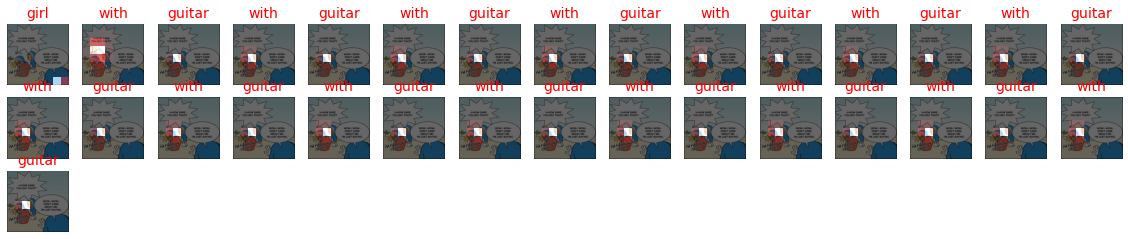

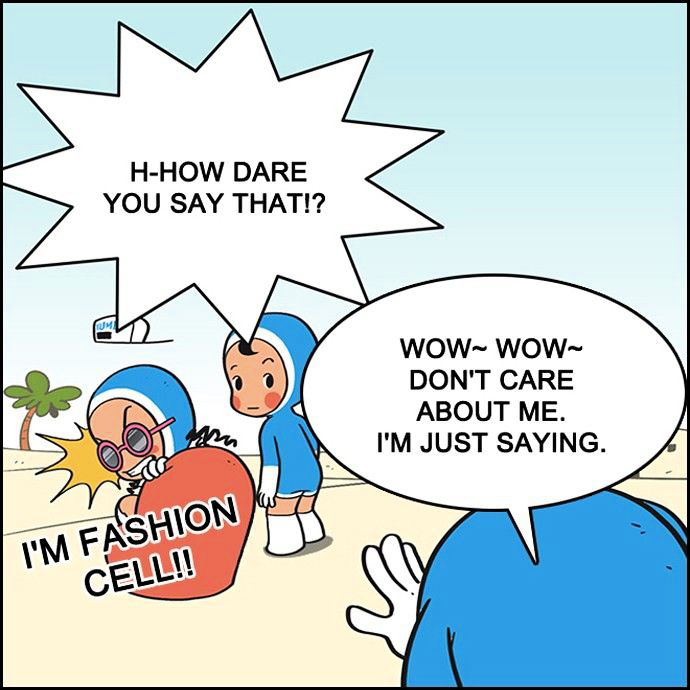

In [67]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.5, 0, 0))
Image.open(test_image)

BLEU score: 40.754258637285986
Real Caption: the solutions team is taking time to come up with an answer and two people are worried about it
Prediction Caption: the girl is worried about the solutions team is worried about the solutions team is worried about the solutions team is worried about the solutions team is worried about the


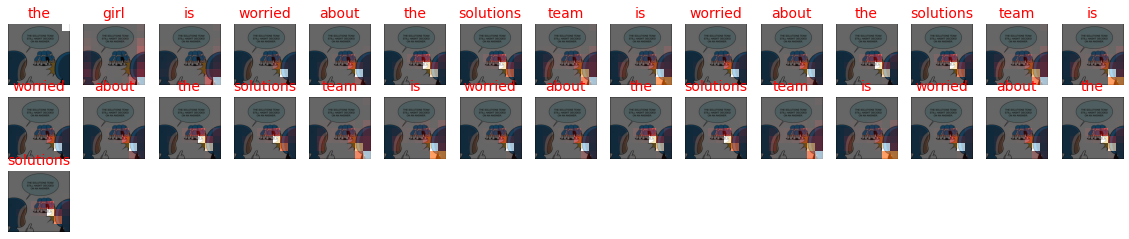

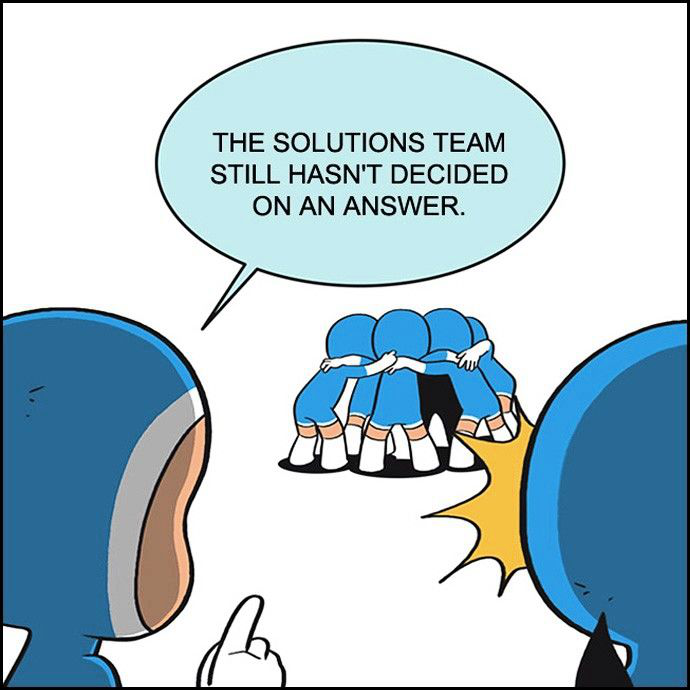

In [68]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.25, 0.25, 0, 0))
Image.open(test_image)

In [69]:
encoder.save_weights('./outputs_encoder')
decoder.save_weights('./outputs_decoder')